In [1]:
import pandas as pd
import datetime as dt
import pytz
import os
import glob
import holidays
import datetime as dt
from holidays import country_holidays
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:

plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
pd.set_option('display.max_columns',50)


In [3]:
us_holidays = country_holidays('US')
us_holidays


holidays.country_holidays('US')

In [4]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

In [5]:
crime_2001 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2001.csv')

In [6]:
crime_2002 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2002.csv')

In [7]:
crime_2003 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2003.csv')

In [8]:
crime_2004= pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2004.csv')

In [9]:
crime_2005 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2005.csv')

In [10]:
crime_2006 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2006.csv')

In [11]:
crime_2007 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2007.csv')

In [12]:
crime_2008 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2008.csv')

In [13]:
crime_2009 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2009.csv')

In [14]:
crime_2010 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2010.csv')

In [15]:
crime_2011 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2011.csv')

In [16]:
crime_2012 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2012.csv')

In [17]:
crime_2013 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2013.csv')

In [18]:
crime_2014 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2014.csv')

In [19]:
crime_2015 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2015.csv')

In [20]:
crime_2016= pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2016.csv')

In [21]:
crime_2017 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2017.csv')

In [22]:
crime_2018 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2018.csv')

In [23]:
crime_2019 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2019.csv')

In [24]:
crime_2020 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2020.csv')

In [25]:
crime_2021 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2021.csv')

In [26]:
crime_2022 = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/chicago_crime/Data/Chicago-Crime_2022.csv')

In [27]:
all_years = [crime_2001, crime_2002, crime_2003, crime_2004, 
             crime_2005, crime_2006, crime_2007, crime_2008, 
             crime_2009, crime_2010, crime_2011, crime_2012,
             crime_2013, crime_2014, crime_2015, crime_2016,
             crime_2017, crime_2018, crime_2019, crime_2020,
             crime_2021, crime_2022]

In [28]:
all_data = pd.concat(all_years)

In [29]:
all_years = pd.concat(all_years)
all_years

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [30]:
all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [31]:
all_years['Date'] = pd.to_datetime(all_years['Date'], format = '%m/%d/%Y %H:%M:%S %p')

In [32]:
all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 662.0+ MB


In [33]:
all_years = all_years.set_index(['Date'])
all_years

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 12:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [34]:
all_years.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713109 entries, 2001-01-01 01:00:00 to 2022-12-31 12:59:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 603.2+ MB


# Stakeholder Questions

## Topic 1) Comparing Police Districts

In [35]:
year_2022 = all_years.loc['2022']
year_2022

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2022-01-01 01:00:00,12582293,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,42.0,41.881884,-87.640060
2022-01-01 01:00:00,12607313,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,811,8.0,23.0,41.787923,-87.769446
2022-01-01 01:00:00,12585671,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,531,5.0,9.0,41.687443,-87.604120
2022-01-01 01:00:00,12592889,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,412,4.0,8.0,41.734353,-87.585147
2022-01-01 01:00:00,12584977,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,1811,18.0,2.0,41.910818,-87.654560
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 12:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [36]:
district_crime_22 = year_2022[['District', 'Primary Type']]
district_crime_22

,District,Primary Type
Date,,
2022-01-01 01:00:00,1.0,THEFT
2022-01-01 01:00:00,8.0,DECEPTIVE PRACTICE
2022-01-01 01:00:00,5.0,CRIMINAL DAMAGE
2022-01-01 01:00:00,4.0,OTHER OFFENSE
2022-01-01 01:00:00,18.0,THEFT
...,...,...
2022-12-31 12:50:00,10.0,ASSAULT
2022-12-31 12:50:00,7.0,ASSAULT
2022-12-31 12:52:00,11.0,BATTERY


In [37]:
crime_22 = district_crime_22.groupby(['District']).count().copy()
crime_22

,Primary Type
District,
1.0,13044
2.0,11793
3.0,11937
4.0,13931
5.0,9773
6.0,14694
7.0,10319
8.0,14805
9.0,10376


In [38]:
crime_22.sort_values(by='Primary Type', ascending=False)

,Primary Type
District,
8.0,14805
6.0,14694
12.0,14341
4.0,13931
11.0,13457
1.0,13044
18.0,12429
19.0,12243
25.0,11951


District 8 had the most crimes

Distriect 31 had the least crimes

## Topic 2) Crimes Across the Years

In [39]:
all_crimes = all_years[['Primary Type']]
df_resample = all_crimes.resample('A').count().copy()
df_resample

,Primary Type
Date,
2001-12-31,485886
2002-12-31,486807
2003-12-31,475985
2004-12-31,469422
2005-12-31,453773
2006-12-31,448179
2007-12-31,437087
2008-12-31,427183
2009-12-31,392827


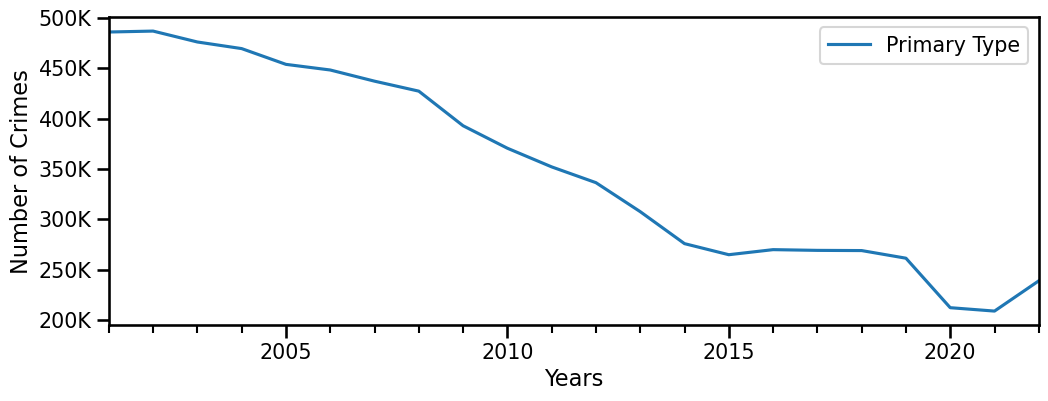

In [40]:
ax = df_resample.plot()
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Years')
ax.yaxis.set_major_formatter(fmt_thous);

the total number of crimes seems to be decreasing over time

In [41]:
crime_counts = all_crimes.groupby('Primary Type').value_counts().sort_index()
crime_counts

Primary Type
ARSON                                  13121
ASSAULT                               501103
BATTERY                              1410889
BURGLARY                              422246
CONCEALED CARRY LICENSE VIOLATION       1019
CRIM SEXUAL ASSAULT                    27584
CRIMINAL DAMAGE                       878914
CRIMINAL SEXUAL ASSAULT                 6353
CRIMINAL TRESPASS                     212869
DECEPTIVE PRACTICE                    340958
DOMESTIC VIOLENCE                          1
GAMBLING                               14616
HOMICIDE                               12394
HUMAN TRAFFICKING                         96
INTERFERENCE WITH PUBLIC OFFICER       18206
INTIMIDATION                            4595
KIDNAPPING                              7185
LIQUOR LAW VIOLATION                   14846
MOTOR VEHICLE THEFT                   366586
NARCOTICS                             746155
NON - CRIMINAL                            38
NON-CRIMINAL                             1

In [42]:
crime_plot = all_crimes[['Primary Type']]

In [43]:
crime_plot

,Primary Type
Date,
2001-01-01 01:00:00,BATTERY
2001-01-01 01:00:00,BATTERY
2001-01-01 01:00:00,GAMBLING
2001-01-01 01:00:00,CRIMINAL DAMAGE
2001-01-01 01:00:00,BATTERY
...,...
2022-12-31 12:50:00,ASSAULT
2022-12-31 12:50:00,ASSAULT
2022-12-31 12:52:00,BATTERY


In [44]:
crime_plot.value_counts()

Primary Type                     
THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE             

In [45]:
all_years['Year'] = all_years.index.year

In [46]:
all_years

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,2001
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,2001
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,2001
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,2001
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,2022
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,2022
2022-12-31 12:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,2022


In [47]:
ay2 = all_years.drop(columns=['ID', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Latitude', 'Longitude', 'Year']).copy()

In [48]:
ay2

,Primary Type
Date,
2001-01-01 01:00:00,BATTERY
2001-01-01 01:00:00,BATTERY
2001-01-01 01:00:00,GAMBLING
2001-01-01 01:00:00,CRIMINAL DAMAGE
2001-01-01 01:00:00,BATTERY
...,...
2022-12-31 12:50:00,ASSAULT
2022-12-31 12:50:00,ASSAULT
2022-12-31 12:52:00,BATTERY


In [49]:
ay2.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               ...
               '2022-12-31 12:41:00', '2022-12-31 12:42:00',
               '2022-12-31 12:44:00', '2022-12-31 12:45:00',
               '2022-12-31 12:45:00', '2022-12-31 12:50:00',
               '2022-12-31 12:50:00', '2022-12-31 12:52:00',
               '2022-12-31 12:52:00', '2022-12-31 12:59:00'],
              dtype='datetime64[ns]', name='Date', length=7713109, freq=None)

In [50]:
ay3 = ay2.groupby('Primary Type').resample('A').count()
ay3

Primary Type
Primary Type      Date                    
ARSON             2001-12-31          1011
                  2002-12-31          1032
                  2003-12-31           955
                  2004-12-31           778
                  2005-12-31           691
...                                    ...
WEAPONS VIOLATION 2018-12-31          5456
                  2019-12-31          6339
                  2020-12-31          8432
                  2021-12-31          8980
                  2022-12-31          8766

[723 rows x 1 columns]

In [51]:
all_crime_counts = ay3.unstack(level=0)

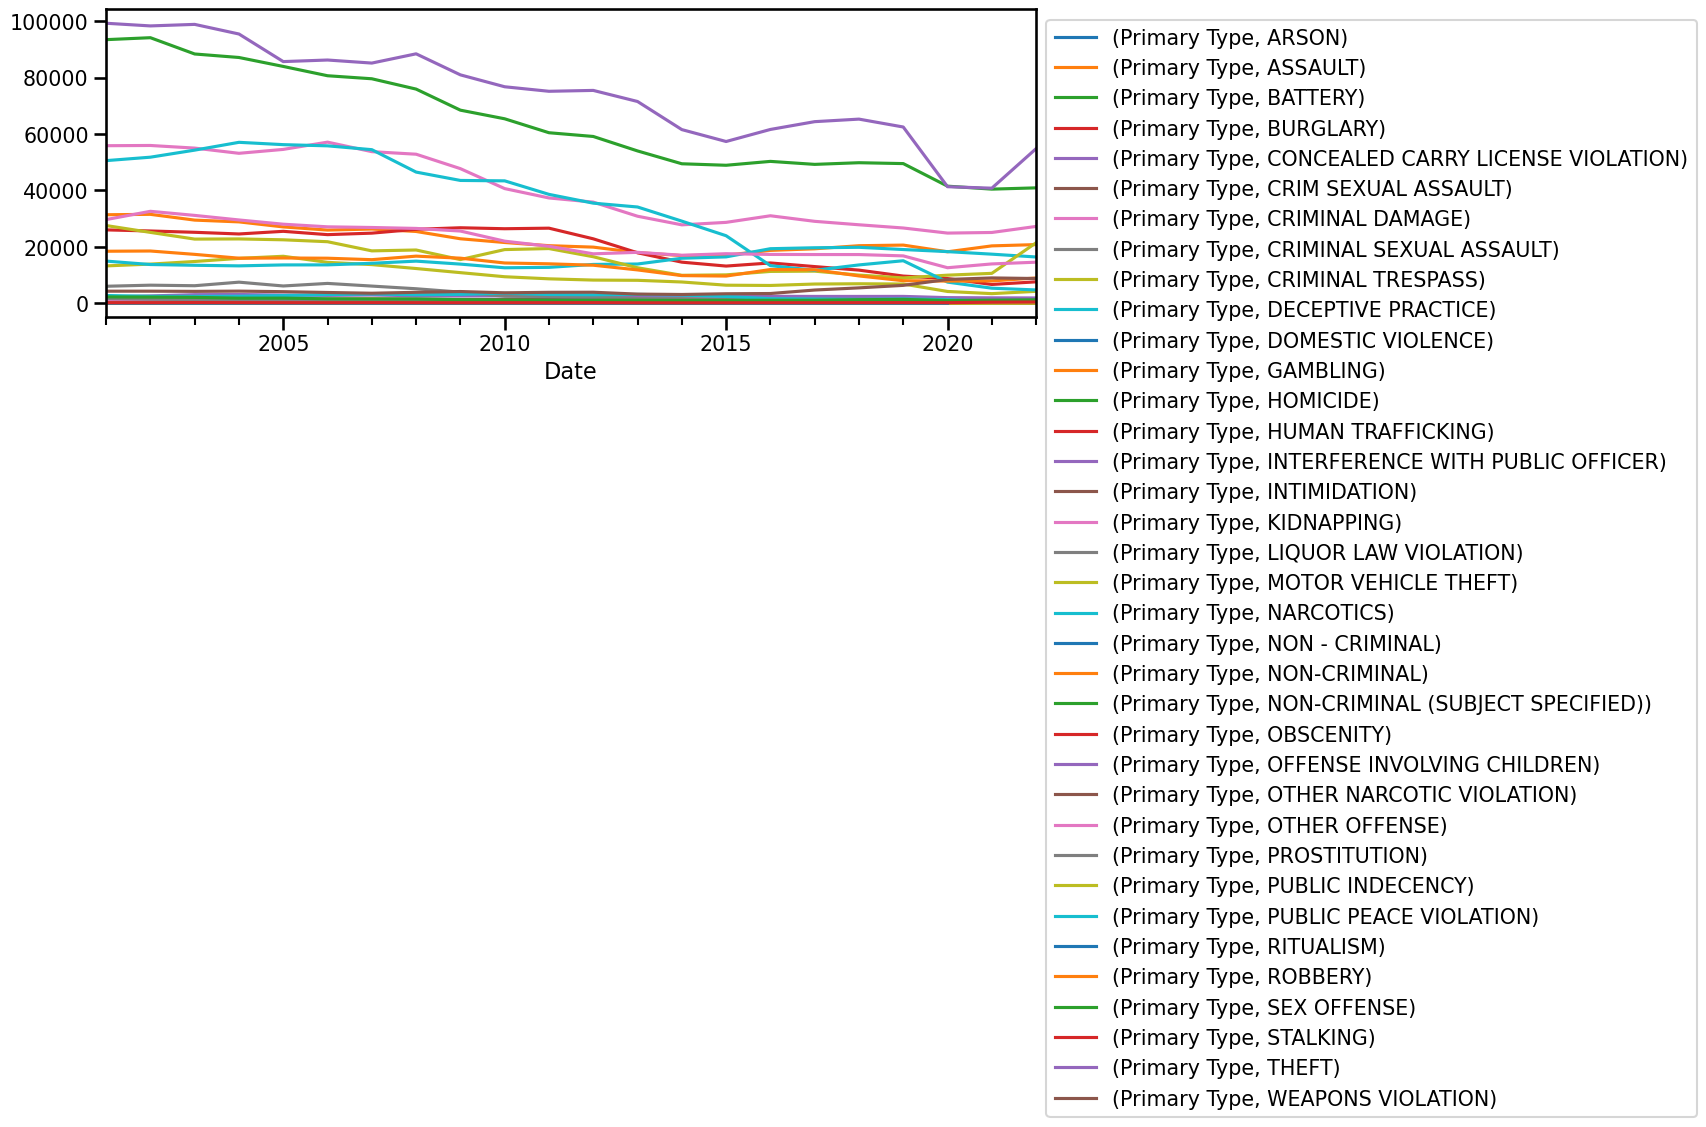

In [52]:
all_crime_counts.plot()
plt.legend(bbox_to_anchor=(1,1));

most crime is going down but theft seems to be going back up

In [53]:
all_crime_counts

Primary Type                             \
Primary Type        ARSON  ASSAULT  BATTERY BURGLARY   
Date                                                   
2001-12-31         1011.0  31384.0  93461.0  26014.0   
2002-12-31         1032.0  31523.0  94153.0  25623.0   
2003-12-31          955.0  29477.0  88380.0  25157.0   
2004-12-31          778.0  28850.0  87136.0  24564.0   
2005-12-31          691.0  27067.0  83964.0  25503.0   
2006-12-31          726.0  25945.0  80666.0  24324.0   
2007-12-31          712.0  26313.0  79593.0  24858.0   
2008-12-31          644.0  25448.0  75930.0  26218.0   
2009-12-31          616.0  22861.0  68460.0  26767.0   
2010-12-31          522.0  21537.0  65401.0  26422.0   
2011-12-31          504.0  20411.0  60459.0  26620.0   
2012-12-31          469.0  19900.0  59134.0  22845.0   
2013-12-31          364.0  17972.0  54006.0  17895.0   
2014-12-31          397.0  16903.0  49453.0  14569.0   
2015-12-31          453.0  17048.0  48923.0  13184.0   
2016-12-31          516.0  18742.0  50300.0  14289.0   
2017-12-31          444.0  19306.0  49239.0  13001.0   
2018-12-31          373.0  20406.0  49828.0  11747.0   
2019-12-31          376.0  20620.0  49517.0   9638.0   
2020-12-31          588.0  18252.0  41513.0   8757.0   
2021-12-31          529.0  20342.0  40462.0   6659.0   
2022-12-31          421.0  20796.0  40911.0   7592.0   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Date                                                                 
2001-12-31                                 1.0              1779.0   
2002-12-31                                 0.0              1807.0   
2003-12-31                                 0.0              1571.0   
2004-12-31                                 0.0              1538.0   
2005-12-31                                 0.0              1521.0   
2006-12-31                                 0.0              1439.0   
2007-12-31                                 0.0              1507.0   
2008-12-31                                 0.0              1515.0   
2009-12-31                                 0.0              1401.0   
2010-12-31                                 0.0              1335.0   
2011-12-31                                 0.0              1459.0   
2012-12-31                                 0.0              1392.0   
2013-12-31                                 0.0              1271.0   
2014-12-31                                15.0              1312.0   
2015-12-31                                34.0              1352.0   
2016-12-31                                36.0              1497.0   
2017-12-31                                69.0              1506.0   
2018-12-31                               149.0              1399.0   
2019-12-31                               217.0               908.0   
2020-12-31                               148.0                75.0   
2021-12-31                               173.0                 NaN   
2022-12-31                               177.0                 NaN   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Date                                                                     
2001-12-31           55859.0                    29.0           13241.0   
2002-12-31           55941.0                    27.0           13880.0   
2003-12-31           55011.0                    41.0           14807.0   
2004-12-31           53164.0                    42.0           15913.0   
2005-12-31           54548.0                    37.0           16655.0   
2006-12-31           57124.0                    47.0           14505.0   
2007-12-31           53749.0                    53.0           13699.0   
2008-12-31           52843.0                    47.0           12310.0   
2009-12-31           47725.0                   

## Topic 4) Comparing Months

## Topic 5) Comparing Holidays

## Topic 6) What cycles (seasonality) can you find in this data?

# Part 2